In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize

In [2]:
plt.style.use('ggplot')

In [123]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['font.size']=16
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 3.6
mpl.rcParams['ytick.major.size'] = 3.6
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

In [2]:
D=363396000 #earth moon periapse in m
M=5.972e24 #earth mass in kg
m=7.34767309e22 #moon mass in kg
R=6371000 #earth radius in m
r=1737000 #moon radius in m
G=6.67408e-11 #G in m, kg and s
H=42164000 #geostationary orbit in m

mu=m/M
alpha=1/3

In [4]:
print(D*960*1e-6)

348860.16


In [126]:
rho=1500
B=5.8e9
S=B/rho
alpha=D*S/(G*M)
print('S: ',S)
print('alpha: ',alpha)

S:  3866666.6666666665
alpha:  3.525377837446902


In [127]:
def tUniform(eps,h,beta,mu):
    return beta*(eps-h)*(np.power(eps*h,-1) - mu*np.power((1-eps)*(1-h),-1))
def area(eps,h,alpha):
    a=np.exp((alpha/h) - (alpha/eps) - 1)
    #a[a<1]=1
    return a
def aTaper(eps,h,alpha):
    a=np.exp((alpha/h) - (alpha/eps))
    return a
def volume(h,alpha):
    return scipy.integrate.quad(area,h,1-(r/D),args=(h,alpha))

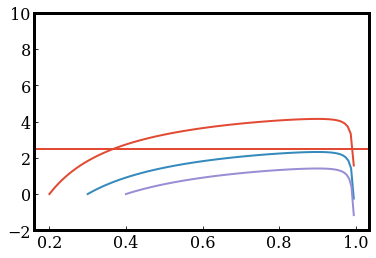

In [128]:
tEta=plt.gca()
h=0.1
rho=1
a0=1e-6
beta=G*M*rho*a0/D
hs=np.linspace(0.2,0.4,3)
for h in hs:
    eps=np.linspace(h,1-(r/D),100)
    Ts=tUniform(eps,h,beta,mu)
    tEta.plot(eps,Ts)
    tEta.axhline(2.5)
tEta.set_ylim(-2,10)
plt.show()

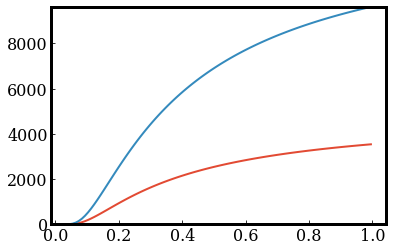

In [129]:
aEps=plt.gca()
h=2*R/D
rho=1
a0=1e-6
alpha=1/3
#hs=np.linspace(0.2,0.4,3)
#for h in hs:
eps=np.linspace(h,1-(r/D),100)
As=area(eps,h,alpha)
tAs=aTaper(eps,h,alpha)
aEps.plot(eps,As)
aEps.plot(eps,tAs)
#    tEta.axhline(2.5)
aEps.set_ylim(0,np.max(tAs))
plt.show()

In [130]:
def hCable(m,a0,alpha):
    return 1/(alpha*np.log(m/(a0*D)))
print(hCable(15000,1e-6,3))
print(H/D)

0.0895982120978
0.11602769430593622


/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


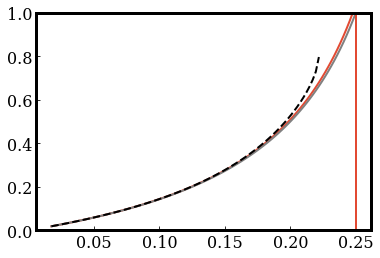

In [131]:
###### double checking the accruacy of curtailing the calculation of epsilon0
#def exactSoln(eps,h,alpha,mu):
#    return (eps-h)*(1-mu/((1-eps)*(1-h))) - eps*h/alpha
def exactSoln(h,alpha,mu):
    b=1 + (h - (mu/(1-h))) / (1-(h/alpha))
    c=h*(1 - (mu/(1-h))) / (1-(h/alpha))
    return (b-np.sqrt((b**2) - 4*c))/2
alpha=1/3
hs=np.linspace((R/D),0.25,100)
approx=hs*alpha*(1-mu)/(alpha*(1-mu)-hs)
badApprox=alpha*hs/(alpha-hs)
exact=exactSoln(hs,alpha,mu)
#exact=scipy.optimize.fsolve(exactSoln,0.99*approx,args=(hs,np.ones(100)*alpha,np.ones(100)*mu),xtol=1e-20)

approxPlot=plt.gca()
approxPlot.plot(hs,approx)
approxPlot.plot(hs,badApprox,c='grey')
approxPlot.plot(hs,exact,c='k',ls='--')
approxPlot.set_ylim(0,1)
approxPlot.axvline(0.25)
plt.show()

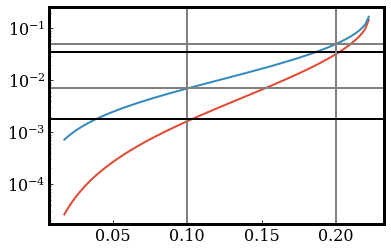

In [132]:
approxPlot=plt.gca()
approxPlot.plot(hs,np.abs(approx-exact)/exact)
approxPlot.plot(hs,np.abs(badApprox-exact)/exact)
approxPlot.set_yscale('log')
approxPlot.axvline(0.1,c='grey')
approxPlot.axhline(0.05,c='grey')
approxPlot.axhline(0.035,c='k')
approxPlot.axvline(0.2,c='grey')
approxPlot.axhline(0.007,c='grey')
approxPlot.axhline(0.0018,c='k')
plt.show()

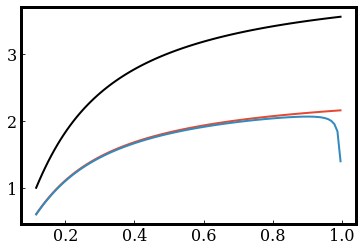

In [133]:
def aFind(h,alpha,mu):
    eps0=exactSoln(h,alpha,mu)
    #print('eps0: ',eps0)
    return np.exp(alpha*((1/eps0) + (mu/(1-eps0))))
def aFull(eps,h,alpha,mu):
    A=aFind(h,alpha,mu)
    #print('h: ',h)
    #print('alpha: ',alpha)
    #print('mu: ',mu)
    #print('A: ',A)
    a=A*np.exp(-alpha*((1/eps) + (mu/(1-eps))))
    #a[a<1]=1
    return a

aEps=plt.gca()
h=H/D
rho=1
a0=1e-6
alpha=1/3
#hs=np.linspace(0.2,0.4,3)
#for h in hs:
eps=np.linspace(h,1-(r/D),100)
As=area(eps,h,alpha)
tAs=aTaper(eps,h,alpha)
fullAs=aFull(eps,h,alpha,mu)
aEps.plot(eps,np.sqrt(As))
aEps.plot(eps,np.sqrt(tAs),c='k')
aEps.plot(eps,np.sqrt(fullAs))
#    tEta.axhline(2.5)
#aEps.set_ylim(0,np.max(tAs))
plt.show()

In [134]:
print(mu)

0.01230353832886805


In [135]:
def fullVolume(h,alpha,mu):
    return scipy.integrate.quad(aFull,h,1-(r/D),args=(h,alpha,mu))
print(fullVolume(h,alpha,mu)[0])
print(volume(h,alpha)[0])

2.7164795426503225
2.832945845130796


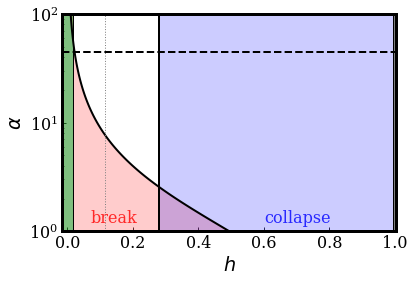

In [136]:
def maxStrength(h,alpha):
    lhs=(1/h) - np.sqrt(mu)/(1-h)
    rhs=1- h*(1-np.sqrt(mu))/(1-mu)
    return lhs*rhs - alpha
def hMin(alpha):
    return scipy.optimize.fsolve(maxStrength,np.ones_like(alpha)*0.1,args=(alpha))
hMax=(1+mu*((D/r)-1))**-1
alphas=10**np.linspace(np.log10(1),np.log10(100),100)
hMins=hMin(alphas)
hFill=np.append(hMins,[R/D,R/D])
aFill=np.append(alphas,[100,1])
hPlot=plt.gca()
hPlot.plot(hMins,alphas,c='k')
hPlot.fill(hFill,aFill,c='red',alpha=0.2)
hPlot.axvline(hMax,c='k')
hPlot.axvspan(hMax,1,color='blue',alpha=0.2)
hPlot.axvline(R/D,c='k',lw=1)
hPlot.axvspan(-R/D,R/D,color='green',alpha=0.5)
hPlot.axvline(H/D,c='grey',ls=':',lw=1)
hPlot.axvspan(1-(r/D),1+(r/D),color='grey')
hPlot.axvline(1-r/D,c='k',lw=1)
hPlot.set_xlim(-R/D,1+(r/D))
hPlot.set_yscale('log')
hPlot.set_ylim(1,100)
hPlot.text(0.6,1.2,'collapse',color='blue',alpha=0.8)
hPlot.text(0.07,1.2,'break',color='red',alpha=0.8)
hPlot.set_xlabel(r'$h$')
hPlot.set_ylabel(r'$\alpha$')

hPlot.axhline(5.13/0.116,c='k',ls='--')
#hPlot.axhline(3.4)
#hPlot.axhline(55)

plt.savefig('plots/uniform.png',bbox_inches='tight')
plt.show()

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less


eps0:  0.120773865625
h:  0.11602769430593622
eps0:  0.120773865625
h:  0.11602769430593622
eps0:  0.120773865625
h:  0.11602769430593622
eps0:  0.120773865625
h:  0.11602769430593622


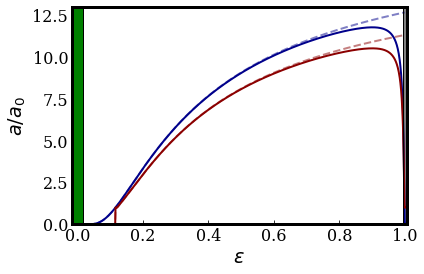

In [137]:
def epsilon0(h,alpha):
    b=1 + (h - (mu/(1-h))) / (1-(h/alpha))
    c=h*(1 - (mu/(1-h))) / (1-(h/alpha))
    eps0=0.5*(b - np.sqrt(b**2 -4*c))
    return eps0
def aPlot(eps,eps0,alpha,mu):
    lhs=(1-eps*(1-mu))/(eps*(1-eps))
    rhs=(1-eps0*(1-mu))/(eps0*(1-eps0))
    return np.exp(-(lhs-rhs)/alpha)
def aHybridPlot(eps,h,alpha,mu):
    eps0=epsilon0(h,alpha)
    A=np.exp((1-eps0*(1-mu))/(alpha*eps0*(1-eps0)))
    a=A*np.exp(-(1-eps*(1-mu))/(alpha*eps*(1-eps)))
    print('eps0: ',eps0)
    print('h: ',h)
    a[a<1]=1
    a[eps<h]=0
    return a
def plotFull(areaPlot,eps,eps0,alpha,colour):
    aFull=aPlot(eps,eps0,alpha,mu)
    aMoon=aPlot(eps,eps0,alpha,0)
    areaPlot.plot(eps,aFull,c=colour)
    areaPlot.plot(eps,aMoon,c=colour,ls='--',alpha=0.5)
def plotHybrid(areaPlot,eps,h,alpha,colour):
    aHybridFull=aHybridPlot(eps,eps0,alpha,mu)
    aHybridMoon=aHybridPlot(eps,eps0,alpha,0)
    areaPlot.plot(eps,aHybridFull,c=colour)
    areaPlot.plot(eps,aHybridMoon,c=colour,ls='--',alpha=0.5) 
eps=np.linspace(0,1,1000)
eps0=H/(D)
alpha=3
aFull=aPlot(eps,eps0,alpha,mu)
aMoon=aPlot(eps,eps0,alpha,0)
aHybridFull=aHybridPlot(eps,eps0,alpha,mu)
aHybridMoon=aHybridPlot(eps,eps0,alpha,0)
areaPlot=plt.gca()
#aPlot.plot(eps,aFull,c='darkblue')
#aPlot.plot(eps,aMoon,c='darkblue',ls='--',alpha=0.5)
#aPlot.plot(eps,aHybridFull,c='darkred')
#aPlot.plot(eps,aHybridMoon,c='darkred',ls='--',alpha=0.5)
plotFull(areaPlot,eps,eps0,alpha,'darkblue')
plotHybrid(areaPlot,eps,eps0,alpha,'darkred')
#aPlot.set_yscale('log')
areaPlot.set_ylim(0,13)
areaPlot.set_xlim(-R/D,1+(r/D))
areaPlot.axvspan(-R/D,R/D,color='green')
areaPlot.axvline(R/D,c='k',lw=1)
areaPlot.axvspan(1-(r/D),1+(r/D),color='grey')
areaPlot.axvline(1-r/D,c='k',lw=1)
areaPlot.set_ylabel(r'$a/a_0$')
areaPlot.set_xlabel(r'$\epsilon$')
plt.savefig('plots/area.pdf',bbox_inches='tight')
plt.show()

height in inches:  12.207816669282687
eps0:  0.071830736405
h:  0.07012735418111371


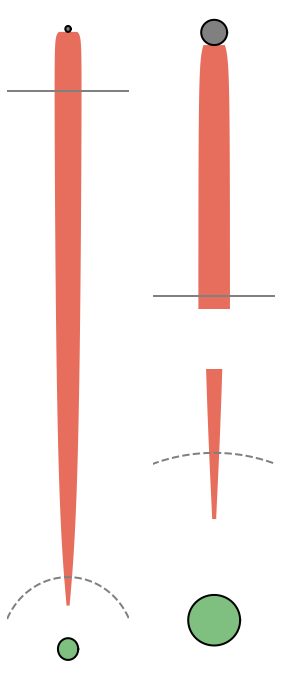

In [138]:
widthInches=4.8
widthEarths=12
heightInches=widthInches*(D+4*R)/(2*R*widthEarths)
mm=widthEarths*R*widthInches/121.92 #width to make line 1mm long
print('height in inches: ',heightInches)
mainFig=plt.figure(figsize=(widthInches,heightInches))
mainGrid=mpl.gridspec.GridSpec(2,2)
mainPlot=plt.subplot(mainGrid[:,0])
mainPlot.set_xlim(-widthEarths*R/2,widthEarths*R/2)
mainPlot.set_ylim(-2*R,D+2*R)

angles=np.linspace(0,2*np.pi,1000)
xEarth=R*np.cos(angles)
yEarth=R*np.sin(angles)
xGeo=H*np.cos(angles)
yGeo=H*np.sin(angles)
#xISS=1.1*R*np.cos(angles)
#yISS=1.1*R*np.sin(angles)
xMoon=r*np.cos(angles)
yMoon=D + (r*np.sin(angles))

h=4*R/D
eps=np.linspace(h,1-(r/D),10000)
area=aHybridPlot(eps,h,3,mu)
rad=600*np.sqrt(1e-6*area/np.pi) #width in mm
xCable=np.hstack((rad*mm,-np.flip(rad,axis=0)*mm))
yCable=np.hstack((D*eps,D*np.flip(eps,axis=0)))

mainPlot.fill(xCable,yCable,alpha=0.8)

mainPlot.fill(xEarth,yEarth,c='green',alpha=0.5)
mainPlot.plot(xEarth,yEarth,c='k')
mainPlot.fill(xMoon,yMoon,color='grey')
mainPlot.plot(xMoon,yMoon,c='k')
mainPlot.plot(xGeo,yGeo,c='grey',ls='--')

mainPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')
mainPlot.set_frame_on(False)
mainPlot.set_xticks([])
mainPlot.set_yticks([])

moonPlot=plt.subplot(mainGrid[0,1])
moonHeight=D+3*r - D*(1-np.sqrt(mu))/(1-mu) # vertical scale of moon plot
moonWidth=moonHeight*widthInches/heightInches
moonPlot.set_ylim(D*(1-np.sqrt(mu))/(1-mu) -r,D+2*r)
moonPlot.set_xlim(-moonWidth/2,moonWidth/2)

moonFudge=0.25
moonPlot.fill(moonFudge*xCable,yCable,alpha=0.8)

moonPlot.fill(xMoon,yMoon,color='grey')
moonPlot.plot(xMoon,yMoon,c='k')
moonPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')

moonPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')
moonPlot.set_frame_on(False)
moonPlot.set_xticks([])
moonPlot.set_yticks([])

earthPlot=plt.subplot(mainGrid[1,1])
earthHeight=1.5*H+2*R # vertical scale of moon plot
earthWidth=earthHeight*widthInches/heightInches
earthPlot.set_ylim(-2*R,1.5*H)
earthPlot.set_xlim(-earthWidth/2,earthWidth/2)

earthFudge=0.5
earthPlot.fill(earthFudge*xCable,yCable,alpha=0.8)

earthPlot.fill(xEarth,yEarth,c='green',alpha=0.5)
earthPlot.plot(xEarth,yEarth,c='k')
earthPlot.plot(xGeo,yGeo,c='grey',ls='--')
#earthPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')

#earthPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')
earthPlot.set_frame_on(False)
earthPlot.set_xticks([])
earthPlot.set_yticks([])

plt.savefig('plots/scale.pdf',bbox_inches='tight')
plt.show()

In [139]:
print(moonHeight/r)

23.8887300526


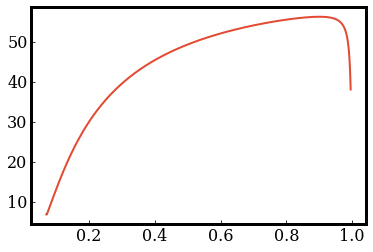

2.76395319577


In [140]:
plt.plot(eps,20*rad)
plt.show()
print(2000*np.sqrt(6e-6/np.pi))

In [141]:
def aHybridIntegrate(eps,h,alpha):
    b=1 + (h - (mu/(1-h))) / (1-(h/alpha))
    c=h*(1 - (mu/(1-h))) / (1-(h/alpha))
    eps0=0.5*(b - np.sqrt(b**2 -4*c))
    A=np.exp((1-eps0*(1-mu))/(alpha*eps0*(1-eps0)))
    a=A*np.exp(-(1-eps*(1-mu))/(alpha*eps*(1-eps)))
    if a<1:
        a=1
    return a
def mIntegrate(h,rho,a0,alpha):
    return D*rho*a0*scipy.integrate.quad(aHybridIntegrate,h,1-r/D,args=(h,alpha))[0]
def optimizeFunction(h,rho,a0,alpha,m):
    return mIntegrate(h,rho,a0,alpha)-m
def hFind(m,rho,a0,alpha):
    return scipy.optimize.brentq(optimizeFunction,1e-6,1-(r/D),args=(rho,a0,alpha,m))
hs=np.zeros((10,10))
alphas=10**np.linspace(0,2,10)
ms=10**np.linspace(4,8,10)
for i in range(10):
    print('i: ',i)
    for j in range(10):
        alpha=alphas[i]
        m=ms[j]
        hs[i,j]=hFind(m,1000,1e-6,alpha)
#print(hFind(15000,1,1e-6,3))

i:  0


/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9


In [142]:
print(mIntegrate(0.33,1000,1e-6,10)/1000)

272.8041768417815


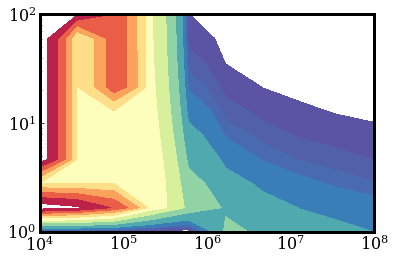

In [143]:
fillLevels=np.array([R/D,2*R/D,3*R/D,4*R/D,H/D,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
X, Y = np.meshgrid(ms, alphas)
bPlot=plt.gca()
bPlot.set_xscale('log')
bPlot.set_yscale('log')
bPlot.contourf(X,Y,hs,fillLevels,cmap='Spectral_r')
plt.show()

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


length:  363396000
length:  726792000
length:  1816980000
length:  7267920000
length:  36339600000
length:  363396000000
length:  36339600000000


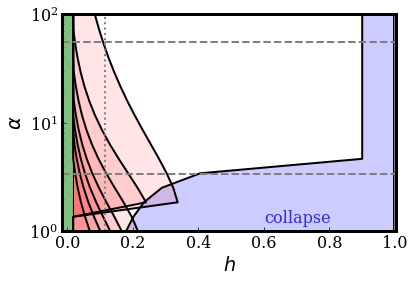

In [144]:
def epsilon1(eps0):
    kappa=(1-eps0*(1-mu))/(eps0*(1-eps0))
    b=1+kappa-mu
    return 0.5*(b+np.sqrt(b**2 - 4*kappa))/kappa
def collapseEpsilon1(alpha):
    hDash=1-(r/D)
    a=alpha - (1/hDash) - (mu/(1-hDash))
    b=alpha - (1/hDash) - (hDash*mu/(1-hDash)) + 1
    return (b-np.sqrt(b**2 - 4*a))/(2*a)
def epsilonCheck(h,alpha):
    collapse=collapseEpsilon1(alpha)
    eps0=epsilon0(h,alpha)
    eps1=epsilon1(eps0)
    return eps1-collapse
def epsilonMax():
    return (1-np.sqrt(mu))/(1-mu)
def hMin(length,alpha):
    rho=1
    a0=1
    m=length*a0*rho
    return hFind(m,rho,a0,alpha)
nHs=16
alphas=10**np.linspace(0,2,nHs)
hs=np.zeros(nHs)
hMins=np.zeros(nHs)
#length=10*D
epsMax=epsilonMax()
for i in range(nHs):
    hs[i]=scipy.optimize.brentq(epsilonCheck,R/D,1-(r/D),args=(alphas[i]))
    #hMins[i]=hMin(length,alphas[i])
    #if hMins[i]>hs[i]:
    #    hMins[i]=hs[i]
hs[hs>epsMax]=epsMax

hFill=np.append(hs,[1-r/D,1-r/D])
aFill=np.append(alphas,[100,1])
#eps0=epsilon0(R/D,3)
#print(eps0)
#print(epsilon1(eps0))
hybridPlot=plt.gca()
hybridPlot.fill(hFill,aFill,c='b',alpha=0.2)
hybridPlot.plot(hs,alphas,c='k',lw=2)

lengths=D*np.array([1,2,5,20,100,1000,100000])
for length in lengths:
    print('length: ',length)
    for i in range(nHs):
        hMins[i]=hMin(length,alphas[i])
    hMins[hMins<R/D]=R/D
    hybridPlot.plot(hMins,alphas,c='k')
    hMinFill=np.append(hMins,[R/D,R/D])
    hybridPlot.fill(hMinFill,aFill,c='r',alpha=0.1)
    
        
#hybridPlot.plot(hMins,alphas,c='k',lw=2)
hybridPlot.set_yscale('log')
hybridPlot.axvspan(-R/D,R/D,color='green',alpha=0.5)
hybridPlot.axvspan(1-(r/D),1+(r/D),color='grey')
hybridPlot.set_xlim(-R/D,1+(r/D))
hybridPlot.axvline(R/D,c='k',lw=1)
hybridPlot.axvline(1-r/D,c='k',lw=1)
hybridPlot.axvline(H/D,c='grey',ls=':')
hybridPlot.axhline(3.4,c='grey',ls='--')
hybridPlot.axhline(55,c='grey',ls='--')
hybridPlot.text(0.6,1.2,'collapse',color='blue',alpha=0.8)
hybridPlot.set_ylim(1,100)
hybridPlot.set_xlabel(r'$h$')
hybridPlot.set_ylabel(r'$\alpha$')
plt.savefig('plots/hybrid.pdf',bbox_inches='tight')
plt.show()

In [145]:
print(D*1e-6*1)

363.39599999999996


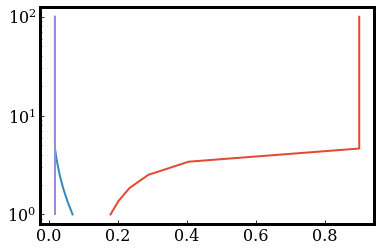

In [146]:
plt.semilogy(hs,alphas)
plt.semilogy(hMins,alphas)
plt.plot([R/D,R/D],[1,100])
plt.show()

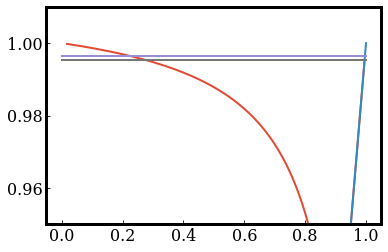

In [147]:
eps0s=np.linspace(R/D,1-(r/D),1000)
eps1s=epsilon1(eps0s)
collapse=collapseEpsilon1(1)
plt.plot(eps0s,eps1s)
plt.plot([0,1],[0,1])
plt.plot([0,1],[collapse,collapse])
plt.plot([0,1],[1-(r/D),1-(r/D)])
plt.ylim(0.95,1.01)
plt.show()

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


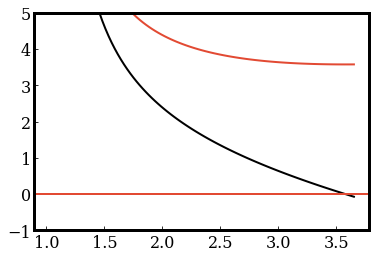

In [148]:
#mass of space elevator with counterweight
def mElevator(l,rho):
    return l*(1+((l/rho)+ 0.5*l*(rho**2) - 1 - 0.5*(l**3))/(l**3 -1))
def mCounter(l,rho):
    return l*((l/rho)+ 0.5*l*(rho**2) - 1 - 0.5*(l**3))/(l**3-1)
rho=0.15
ls=np.linspace(1,np.sqrt(2/0.15),100)
ms=mElevator(ls,rho)
mCs=mCounter(ls,rho)
uElevator=plt.gca()
uElevator.plot(ls,ms)
uElevator.plot(ls,mCs,c='k')
uElevator.axhline(0)
#uElevator.axhline(np.sqrt(2/0.15))
#uElevator.axvline(np.sqrt(2/0.15))
#uElevator.set_xlim(3,5)
uElevator.set_ylim(-1,5)
plt.show()

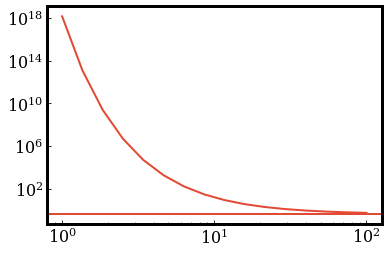

In [149]:
#area of tapered space elevator
def aElevator(epsilon,rho,beta):
    a=np.exp(((1/rho) + 0.5*(rho**2) - (1/epsilon) - 0.5*(epsilon**2))/beta)
    if a>=1:
        return a
    else:
        return 0
def lambdaTaper(beta):
    rho=0.15
    return H*scipy.integrate.quad(aElevator,rho,np.inf,args=(rho,beta))[0]
alphas=10**np.linspace(0,2,16)
lambdas=np.zeros(16)
for i in range(16):
    lambdas[i]=lambdaTaper(H*alphas[i]/D)
bPlot=plt.gca()
bPlot.plot(alphas,lambdas/D)
bPlot.axhline(np.sqrt(2/0.15)*H/D)
bPlot.set_yscale('log')
bPlot.set_xscale('log')
plt.show()

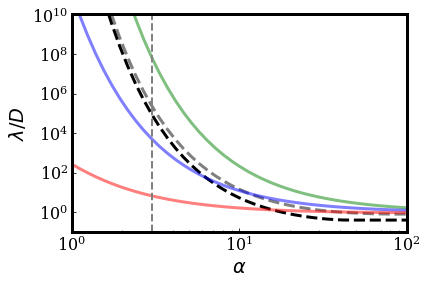

In [209]:
def eFunction(eps,alpha,rho):
    lhs= (1/rho) + 0.5*(rho**2)
    rhs= (1/eps) + 0.5*(eps**2)
    return lhs-rhs-(H/D)*alpha
def eEpsilon0(alpha):
    rho=R/H
    #print('eps0: ',eFunction(1,alpha,rho))
    if eFunction(1,alpha,rho)<0:
        return scipy.optimize.brentq(eFunction,1,100,args=(0,rho))
    return scipy.optimize.brentq(eFunction,rho,1,args=(alpha,rho))
def eEpsilon1(alpha):
    rho=R/H
    return scipy.optimize.brentq(eFunction,1,100,args=(alpha,rho))
def lFunction(eps,alpha,eps1):
    lhs= (1/eps1) + 0.5*(eps1**2)
    rhs= (1/eps) + 0.5*(eps**2)
    return lhs-rhs+(H/D)*alpha
def lEpsilon(alpha,epsilon1):
    #print('lower: ',lFunction(epsilon1,alpha,epsilon1))
    #print('upper: ',lFunction(100,alpha,epsilon1))
    return scipy.optimize.brentq(lFunction,epsilon1,100,args=(alpha,epsilon1))
def eArea(eps,alpha):
    rho=R/H
    return np.exp(D*eFunction(eps,alpha,rho)/(H*alpha))
def eLambda(alpha):
    rho=R/H
    epsilon0=eEpsilon0(alpha)
    #print('eps0: ',epsilon0)
    if epsilon0>1:
        return epsilon0-rho
    epsilon1=eEpsilon1(alpha)
    #print('eps1: ',epsilon1)
    l=lEpsilon(alpha,epsilon1)
    middle=scipy.integrate.quad(eArea,epsilon0,epsilon1,args=(alpha))[0]
    return (epsilon0-rho)+(l-epsilon1)+middle
def eBadArea(eps,alpha):
    rho=R/H
    lhs= (1/rho) + 0.5*(rho**2)
    rhs= (1/eps) + 0.5*(eps**2)
    return np.exp(D*(lhs-rhs)/(H*alpha))
def eBadLambda(alpha):
    return scipy.integrate.quad(eBadArea,R/H,np.inf,args=(alpha))[0]
nAlphas=64
alphas=10**np.linspace(0,3,nAlphas)
eLambdas=np.zeros(nAlphas)
eBadLambdas=np.zeros(nAlphas)
#minLambdas=np.zeros(nAlphas)
atmLambdas=np.zeros(nAlphas)
twoLambdas=np.zeros(nAlphas)
geoLambdas=np.zeros(nAlphas)
for i in range(nAlphas):
#    hMin=scipy.optimize.brentq(epsilonCheck,R/D,1-(r/D),args=(alphas[i]))
#    if hMin>epsMax:
#        hMin=epsMax
#    minLambdas[i]=np.max([mIntegrate(hMin,1,1,alphas[i]),D*(epsMax-(r/D))])
#    if np.isnan(minLambdas[i]):
#        minLambdas[i]=D*(epsMax-(r/D))
#    if np.isnan(minLambdas[i]):
#        minLambdas[i]=D*(epsMax-(r/D))
#    minLambdas[i]=mIntegrate(0.25,1,1,alphas[i])
    eLambdas[i]=eLambda(alphas[i])
    eBadLambdas[i]=eBadLambda(alphas[i])
    atmLambdas[i]=mIntegrate(R/D,1,1,alphas[i])
    twoLambdas[i]=mIntegrate(2*R/D,1,1,alphas[i])
    geoLambdas[i]=mIntegrate(H/D,1,1,alphas[i])
    
lPlot=plt.gca()
lPlot.plot(alphas,H*eLambdas/D,c='k',ls='--',lw=3)
lPlot.plot(alphas,H*eBadLambdas/D,c='k',ls='--',lw=3,alpha=0.5)
#lPlot.plot(alphas,minLambdas/D,color='purple',alpha=0.5,lw=3)
lPlot.plot(alphas,atmLambdas/D,color='green',alpha=0.5,lw=3)
#lPlot.plot(alphas,np.exp(1/(alphas*R/D)),color='green',alpha=0.5,lw=3,ls=':')
lPlot.plot(alphas,twoLambdas/D,color='blue',alpha=0.5,lw=3)
#lPlot.plot(alphas,np.exp(1/(alphas*2*R/D)),color='blue',alpha=0.5,lw=3,ls=':')
lPlot.plot(alphas,geoLambdas/D,color='red',alpha=0.5,lw=3)
#lPlot.plot(alphas,np.exp(1/(alphas*H/D)),color='red',alpha=0.5,lw=3,ls=':')
lPlot.axvline(3,c='grey',ls='--')
lPlot.set_yscale('log')
lPlot.set_xscale('log')
lPlot.set_yticks([1,1e2,1e4,1e6,1e8,1e10])
lPlot.set_ylim(0.1,1e10)
lPlot.set_xlim(1,100)
lPlot.set_ylabel(r'$\lambda/D$')
lPlot.set_xlabel(r'$\alpha$')
plt.show()

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


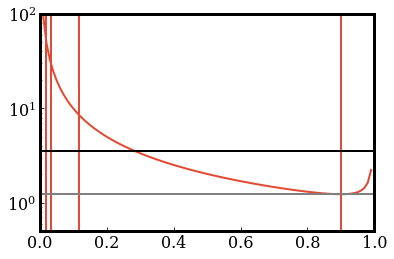

In [301]:
def eta(eps,value=0): #finds eta for a given eps, the optional parameter "value" is used for root finding
    top=1-eps*(1-mu)
    bottom=eps*(1-eps)
    return (top/bottom) - value
epss=np.linspace(0,1,100)
etas=eta(epss)
etaPlot=plt.gca()
etaPlot.plot(epss,etas)
etaPlot.axvline(R/D)
etaPlot.axvline(2*R/D)
etaPlot.axvline(H/D)
etaPlot.axvline((1-np.sqrt(mu))/(1-mu))
etaPlot.axhline(eta(1-r/D),c='k')
etaPlot.axhline(np.power(1+np.sqrt(mu),2),c='grey')
etaPlot.set_yscale('log')
etaPlot.set_ylim(0.5,100)
etaPlot.set_xlim(0,1)
plt.show()

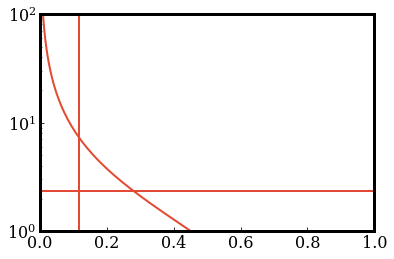

In [303]:
def hSearch(value,lBound,uBound): # finds the h at which eta is equal to a given value
    return scipy.optimize.brentq(eta,lBound,uBound,args=(value))
alphas=10**np.linspace(0,2,32)
hMins=np.zeros(32)
for i in range(32):
    hMins[i]=hSearch(alphas[i]+1.234,1e-6,1/(1+np.sqrt(mu)))
uniformPlot=plt.gca()
uniformPlot.plot(hMins,alphas)
uniformPlot.set_yscale('log')
uniformPlot.set_ylim(1,100)
uniformPlot.set_xlim(0,1)
uniformPlot.axvline(H/D)
uniformPlot.axhline(eta(1-r/D)-1.234)
plt.show()

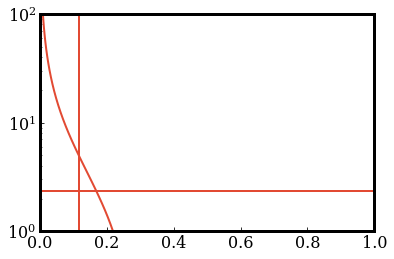

In [311]:
alphas=10**np.linspace(0,2,32)
hMins=np.zeros(32)
for i in range(32):
    hMins[i]=hSearch(alphas[i]+eta(1-r/D),1e-6,1/(1+np.sqrt(mu)))
hybridPlot=plt.gca()
hybridPlot.plot(hMins,alphas)
hybridPlot.set_yscale('log')
hybridPlot.set_ylim(1,100)
hybridPlot.set_xlim(0,1)
hybridPlot.axvline(H/D)
hybridPlot.axhline(eta(1-r/D)-1.234)
plt.show()

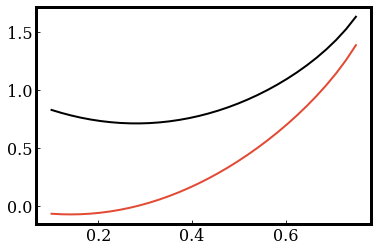

In [290]:
def muMinAnchor(h):
    top=eta(1-r/D)-eta(h)
    bottom=(h)**-2 - mu*(1-h)**-2
    return top/bottom
def lambdaSum(h):
    return (1-h-r/D)+muMinAnchor(h)
hs=np.linspace(0.1,0.75,32)
plt.plot(hs,muMinAnchor(hs))
plt.plot(hs,lambdaSum(hs),c='k')
plt.show()

In [291]:
print(eta(1-r/D))
print(1/3.6)

3.5788135832871
0.2777777777777778


In [293]:
print(np.min(lambdaSum(hs))*D*970*1e-6)

251920.969536


In [236]:
print(eta(hMins))

[-0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412]


In [302]:
print(np.roots([eta(1-r/D),-(1+eta(1-r/D)+mu),1]))
print((1+0.5*mu)/eta(1-r/D))
print(H/D)

[ 1.00476225  0.27809784]
0.2811411507610002
0.11602769430593622


In [312]:
print(1.5e8/H)

3.557537235556399
